# Uber Data Analysis - Part 2

<b>Basic Functionalities on the Data Set and a basic plot</b>

I have taken up the Uber pick ups in NYC Data Set from Kaggle for the month of April , May , June , July , August and Septmeber

Link to the DataSet: https://www.kaggle.com/fivethirtyeight/uber-pickups-in-new-york-city/version/2

Data Type: Raw

Data Size:</br> 
uber-raw-data-apr14.csv - 26.11 MB</br>
uber-raw-data-may14.csv - 30.17 MB</br>
uber-raw-data-jun14.csv - 30.70 MB</br>
uber-raw-data-jul14.csv - 36.87 MB</br>
uber-raw-data-aug14.csv - 38.32 MB</br>
uber-raw-data-sep14.csv - 47.54 MB</br>

For this part of the project I have analysed the Uber rides per base based on parameters like the Month and Day of the week.

### How does the dashboard work?

I have created two parts for the dashboard both of the interactivities are similar to one another but the second one is just an in depth analysis of the previous one. </br>
The first part of the dashboard is where I have create two bar plots. The first one represents the total rides for every base that is a part of the data set. A Base is a location allocated to a set of longitudinal and latitudinal extents. Each bar in the first plot represents the total rides for that particular Base. The second bar plot is the month wise division of rides for that base. So when a user selects a bar on the first plot ( basically a particlar Base is selected ) then a relative bar plot showing the month wise rides for that Base is generated as a result. For example if a user selects the bar for Base B02512 then the relative bar plot on the right will have the month wise division of rides for B02512 i.e rides in April, May, June, July, August and September. </br>

The second part of the dashboard is based on a similar iteractivity but is an in depth analysis of the first part of the dashboard. The bar plot on the left shows the Rides per base per month. The chart on the right is the rides per base per day of the week for the selected month in the plot on the left. For example if the user selects the base B02512 on the first plot , it highlights all the bars and then the user click on a partiular bar for the base ( which is actually the month ) then the plot generated on the right is the count of the total rides per day of the week for B02512 for that selected month.</br>
There is a shortcoming on the plot on the left when the user selectes a base all the bars for the six months are highlighted and when a particular month is selected that is not highlighted individually making it a little difficult for the user. </br>

I have also attached two GIFs to show how the interactivities work.


### Cotextual Data and Why would they be useful ?
Link to the data : https://www.kaggle.com/fivethirtyeight/uber-pickups-in-new-york-city/version/2?select=other-Lyft_B02510.csv </br>
Importance: This is lyfts data for a given base and this can be used to draw comparisions between Uber & Lyft rides in that particular area and hence draw conclusions</br>

Link to the data : https://www.kaggle.com/fivethirtyeight/uber-pickups-in-new-york-city/version/2?select=Uber-Jan-Feb-FOIL.csv</br>
Importance: This is uber's data for the months of Jan and Feb for the year of 2015 , we can use this as well to draw comparisions and find out patterns between 2014 and 2015</br>


In [1]:
import pandas as pd
import calendar
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import ipywidgets

# Importing the Files

In [2]:
# I have attached the data sets along please download them in the same location as the notbook and run them together
df1=pd.read_csv("uber-raw-data-apr14.csv")
df2=pd.read_csv("uber-raw-data-may14.csv")
df3=pd.read_csv("uber-raw-data-jun14.csv")
df4=pd.read_csv("uber-raw-data-jul14.csv")
df5=pd.read_csv("uber-raw-data-aug14.csv")
df6=pd.read_csv("uber-raw-data-sep14.csv")

In [3]:
#Aggregating the 6 different files using the concat function 
final_df=pd.concat([df1,df2,df3,df4,df5,df6])

In [4]:
#Checking the Final DF
final_df

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512
...,...,...,...,...
1028131,9/30/2014 22:57:00,40.7668,-73.9845,B02764
1028132,9/30/2014 22:57:00,40.6911,-74.1773,B02764
1028133,9/30/2014 22:58:00,40.8519,-73.9319,B02764
1028134,9/30/2014 22:58:00,40.7081,-74.0066,B02764


In [5]:
# Initally summary of the Data Set 
final_df.describe()

,Lat,Lon
count,4.534327e+06,4.534327e+06
mean,4.073926e+01,-7.397302e+01
std,3.994991e-02,5.726670e-02
min,3.965690e+01,-7.492900e+01
25%,4.072110e+01,-7.399650e+01
50%,4.074220e+01,-7.398340e+01
75%,4.076100e+01,-7.396530e+01
max,4.211660e+01,-7.206660e+01


In [6]:
final_df['Date/Time'] = pd.to_datetime(final_df['Date/Time'])

In [7]:
# Fetching the Month from the data set

final_df['Month'] = final_df['Date/Time'].dt.month

In [8]:
final_df['Month']

0          4
1          4
2          4
3          4
4          4
          ..
1028131    9
1028132    9
1028133    9
1028134    9
1028135    9
Name: Month, Length: 4534327, dtype: int64

In [9]:
#Sorting the data according to the month 
final_df=final_df.sort_values(by='Month', ascending=False)

#Converting the month values to month names 
final_df['Month'] = final_df['Month'].apply(lambda x: calendar.month_abbr[x])

In [10]:
final_df['Month']

1028135    Sep
342707     Sep
342720     Sep
342719     Sep
342718     Sep
          ... 
376351     Apr
376352     Apr
376353     Apr
376354     Apr
0          Apr
Name: Month, Length: 4534327, dtype: object

In [11]:
#Fetching the day from the data set 
final_df['Day'] = final_df['Date/Time'].dt.day

In [12]:
#Fetching the day of the weel from the data set 
final_df['DOW'] = final_df['Date/Time'].dt.dayofweek

In [13]:
#checking the data set again
final_df

,Date/Time,Lat,Lon,Base,Month,Day,DOW
1028135,2014-09-30 22:58:00,40.7140,-73.9496,B02764,Sep,30,1
342707,2014-09-06 10:48:00,40.6733,-73.9763,B02617,Sep,6,5
342720,2014-09-06 10:50:00,40.7218,-73.9947,B02617,Sep,6,5
342719,2014-09-06 10:50:00,40.7933,-73.9152,B02617,Sep,6,5
342718,2014-09-06 10:50:00,40.7152,-74.0131,B02617,Sep,6,5
...,...,...,...,...,...,...,...
376351,2014-04-07 05:25:00,40.7283,-74.0031,B02682,Apr,7,0
376352,2014-04-07 05:25:00,40.6141,-73.9187,B02682,Apr,7,0
376353,2014-04-07 05:26:00,40.7341,-73.9812,B02682,Apr,7,0
376354,2014-04-07 05:26:00,40.7349,-73.9813,B02682,Apr,7,0


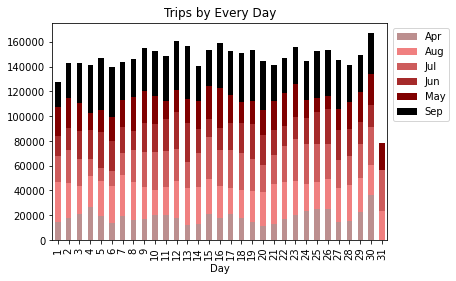

In [14]:
#Trips Every Day for Each Month
final_df.groupby(['Month','Day'])['Day'].count().unstack('Month').plot.bar(stacked=True,color=("rosybrown","lightcoral","indianred","brown","maroon","black"),title="Trips by Every Day").legend(bbox_to_anchor=(1.2, 1))

In [15]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4534327 entries, 1028135 to 0
Data columns (total 7 columns):
 #   Column     Dtype         
---  ------     -----         
 0   Date/Time  datetime64[ns]
 1   Lat        float64       
 2   Lon        float64       
 3   Base       object        
 4   Month      object        
 5   Day        int64         
 6   DOW        int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 276.8+ MB


In [16]:
final_df.describe()

,Lat,Lon,Day,DOW
count,4.534327e+06,4.534327e+06,4.534327e+06,4.534327e+06
mean,4.073926e+01,-7.397302e+01,1.594337e+01,2.968115e+00
std,3.994991e-02,5.726670e-02,8.744902e+00,1.875971e+00
min,3.965690e+01,-7.492900e+01,1.000000e+00,0.000000e+00
25%,4.072110e+01,-7.399650e+01,9.000000e+00,1.000000e+00
50%,4.074220e+01,-7.398340e+01,1.600000e+01,3.000000e+00
75%,4.076100e+01,-7.396530e+01,2.300000e+01,5.000000e+00
max,4.211660e+01,-7.206660e+01,3.100000e+01,6.000000e+00


In [17]:
# Fetching the hour, minute and second 
final_df['Hour'] = pd.DatetimeIndex(final_df['Date/Time']).hour
final_df['Minute'] = pd.DatetimeIndex(final_df['Date/Time']).minute
final_df['Second'] = pd.DatetimeIndex(final_df['Date/Time']).second

In [18]:
# Checkig the final Data set
final_df

,Date/Time,Lat,Lon,Base,Month,Day,DOW,Hour,Minute,Second
1028135,2014-09-30 22:58:00,40.7140,-73.9496,B02764,Sep,30,1,22,58,0
342707,2014-09-06 10:48:00,40.6733,-73.9763,B02617,Sep,6,5,10,48,0
342720,2014-09-06 10:50:00,40.7218,-73.9947,B02617,Sep,6,5,10,50,0
342719,2014-09-06 10:50:00,40.7933,-73.9152,B02617,Sep,6,5,10,50,0
342718,2014-09-06 10:50:00,40.7152,-74.0131,B02617,Sep,6,5,10,50,0
...,...,...,...,...,...,...,...,...,...,...
376351,2014-04-07 05:25:00,40.7283,-74.0031,B02682,Apr,7,0,5,25,0
376352,2014-04-07 05:25:00,40.6141,-73.9187,B02682,Apr,7,0,5,25,0
376353,2014-04-07 05:26:00,40.7341,-73.9812,B02682,Apr,7,0,5,26,0
376354,2014-04-07 05:26:00,40.7349,-73.9813,B02682,Apr,7,0,5,26,0


In [19]:
# Few more imports
import matplotlib.pyplot as plt # importing matplotlib for manipulating figures
import ipywidgets # for interactivity
import numpy as np
import pandas as pd
from pandas.api.types import is_numeric_dtype, is_datetime64_any_dtype #to check the data type of columns

In [20]:
#Downsizing to check the data since there the data set is too huge
nsamples = 5000
downSampleMask = np.random.choice(range(len(final_df)-1), nsamples, replace=False)
final_df_DS = final_df.iloc[downSampleMask]

In [21]:
final_df_DS

,Date/Time,Lat,Lon,Base,Month,Day,DOW,Hour,Minute,Second
146853,2014-07-16 03:17:00,40.7828,-73.9121,B02598,Jul,16,2,3,17,0
632766,2014-08-05 07:36:00,40.7279,-74.0038,B02682,Aug,5,1,7,36,0
489746,2014-05-09 21:56:00,40.7881,-73.9759,B02682,May,9,4,21,56,0
85673,2014-08-07 20:30:00,40.7605,-73.9822,B02598,Aug,7,3,20,30,0
115373,2014-09-11 05:53:00,40.6728,-73.9530,B02598,Sep,11,3,5,53,0
...,...,...,...,...,...,...,...,...,...,...
314702,2014-04-28 14:52:00,40.7452,-73.9961,B02617,Apr,28,0,14,52,0
682971,2014-07-16 10:57:00,40.7796,-73.9773,B02682,Jul,16,2,10,57,0
537561,2014-07-27 15:31:00,40.7620,-73.9716,B02617,Jul,27,6,15,31,0
656070,2014-06-05 14:07:00,40.7242,-74.0022,B02764,Jun,5,3,14,7,0


In [22]:
final_df.head()

,Date/Time,Lat,Lon,Base,Month,Day,DOW,Hour,Minute,Second
1028135,2014-09-30 22:58:00,40.7140,-73.9496,B02764,Sep,30,1,22,58,0
342707,2014-09-06 10:48:00,40.6733,-73.9763,B02617,Sep,6,5,10,48,0
342720,2014-09-06 10:50:00,40.7218,-73.9947,B02617,Sep,6,5,10,50,0
342719,2014-09-06 10:50:00,40.7933,-73.9152,B02617,Sep,6,5,10,50,0
342718,2014-09-06 10:50:00,40.7152,-74.0131,B02617,Sep,6,5,10,50,0


In [23]:
# Creating the plot for Rides per base per month 

import bqplot
from bqplot import pyplot as plt

fig = plt.figure(title="Rides Per Base Per Month",
                 #fig_margin={'top':50, 'bottom':20, 'left':150, 'right':150},
                 legend_location="top-left")

month = final_df.groupby(['Month','Base'])['Date/Time'].count().unstack('Month')

bar_chart  = plt.bar(x = month.index.tolist(), y= month.T.to_numpy(),
                     labels = month.columns.tolist(),
                     display_legend=True,
                    interactions = {'click': 'select'},
                 anchor_style = {'fill': 'white'},
                 selected_style={'stroke': 'white', 'stroke-width': 3},
                 unselected_style={'opacity':0.6})

bar_chart.type = "grouped"

bar_chart.colors = ["violet","fuchsia","darkviolet","rebeccapurple","deeppink","crimson","red" ]


plt.show()

In [24]:
# Defining the two plots in the first interactivity 
from bqplot import pyplot as plt
from bqplot import LinearScale

# Getting the max range for the rides to set the y limit 
y_max = month.max().max()
y_linear = LinearScale(max=float(y_max))

fig3 = plt.figure(title="Total Rides Per Base",
                 #fig_margin={'top':50, 'bottom':20, 'left':150, 'right':150},
                 legend_location="top-left")

base = final_df.groupby(['Base']).size()


base_chart  = plt.bar(x = base.index.tolist(), y= base.to_numpy(),
                    interactions = {'click': 'select'},
                 anchor_style = {'fill': 'white'},
                 selected_style={'stroke': 'white', 'stroke-width': 3},
                 unselected_style={'opacity':0.6})
# bar_chart.ylim(0, y_max+1000)

base_chart.colors = ["red"]

#Sizing the figure in the first part of the dahboard
fig3.layout.width='50%'


#Creating the second plot for the first part of the dashboard
m1 = final_df.groupby(['Month']).size()

fig4 = plt.figure(title="Rides Month wise for the Base")


m1_plot  = plt.bar(x = m1.index.tolist(), y= m1.to_numpy())


m1_plot.colors = ["bisque","tan","lavender","lightpink","aqua","beige"]

fig4.layout.width='50%'

In [25]:
#Code for interactivity between the bar plots 

out = ipywidgets.Output()

def on_selected_base(self, change, final_df):
#     print(change, self)
    base = None
    month = None
    if len(self.selected) == 0:
            label.value = 'No data selected!!'
            return
    base = self.x[change['data']['index']]

    
    subset = final_df.loc[(final_df['Base'] == base)]
    
    dow = subset.groupby(['Month']).size()
    
    m1_plot.x = dow.index.tolist()
    m1_plot.y = dow.values.tolist()
    
base_chart.on_element_click(lambda _, x: on_selected_base(_, x, final_df))

db = ipywidgets.HBox([fig3, fig4])
db

In [26]:
# Creating the plot for the Rides per base per day of the week for the selected month 
dow = final_df.groupby(['Base','DOW'])['Base'].count().unstack('DOW')#.plot.bar(stacked=False,color=("bisque","tan","lavender","lightgrey","aqua","beige","lightpink"),title="Trips by Bases and Days of Week",figsize=(10,7),width=0.8,legend=False).legend(bbox_to_anchor=(1.2, 1))
dow

fig = plt.figure(title="Rides Per Base for the selected Month Per Day in the Month ",
                 fig_margin={'top':50, 'bottom':20, 'left':150, 'right':150})

dow = final_df.groupby(['DOW','Base'])['Date/Time'].count().unstack('DOW')

dow_plot  = plt.bar(x = [str(x) for x in dow.columns.tolist()], y= dow.to_numpy())

dow_plot.type = "grouped"

dow_plot.colors = ["aqua" , "turquoise" , "seagreen" , "aquamarine" , "forestgreen" , "silver" , "black"]

plt.show()

In [27]:
# Defining the Onclick event 
# Calback function to interact with bar plot
def on_selected(self, change, final_df):
#     print(change, self)
    base = None
    month = None
    if len(self.selected) == 0:
            label.value = 'No data selected!!'
            return
    base = self.x[change['data']['index']]
    month = self.labels[change['data']['subIndex']]

    
    subset = final_df.loc[(final_df['Base'] == base) & (final_df['Month'] == month)]
    
    dow = subset.groupby(['DOW','Base'])['Date/Time'].count().unstack('DOW')
    
    dow_plot.x = [str(x) for x in dow.columns.tolist()]
    dow_plot.y = dow.values.tolist()
    
bar_chart.on_element_click(lambda _, x: on_selected(_, x, final_df))

In [28]:
#Defining the two plots for the second interactivity

from bqplot import pyplot as plt
from bqplot import LinearScale

y_max = month.max().max()
y_linear = LinearScale(max=float(y_max))

fig = plt.figure(title="Rides Per Base Per Month",
                 #fig_margin={'top':50, 'bottom':20, 'left':150, 'right':150},
                 legend_location="top-left")

month = final_df.groupby(['Month','Base'])['Date/Time'].count().unstack('Month')


bar_chart  = plt.bar(x = month.index.tolist(), y= month.T.to_numpy(),
                     scales = {'y': y_linear},
                     labels = month.columns.tolist(),
                     display_legend=True,
                    interactions = {'click': 'select'},
                 anchor_style = {'fill': 'white'},
                 selected_style={'stroke': 'white', 'stroke-width': 3},
                 unselected_style={'opacity':0.6})
# bar_chart.ylim(0, y_max+1000)

bar_chart.type = "grouped"

bar_chart.colors = ["violet","fuchsia","darkviolet","rebeccapurple","deeppink","crimson","red" ]

fig.layout.width = '50%'


#Figure two of the seconf interactivity
dow = final_df.groupby(['Base','DOW'])['Base'].count().unstack('DOW')#.plot.bar(stacked=False,color=("bisque","tan","lavender","lightgrey","aqua","beige","lightpink"),title="Trips by Bases and Days of Week",figsize=(10,7),width=0.8,legend=False).legend(bbox_to_anchor=(1.2, 1))
dow

fig2 = plt.figure(title="Rides Per Base for the selected Month Per Day in the Month")

dow = final_df.groupby(['DOW','Base'])['Date/Time'].count().unstack('DOW')

dow_plot  = plt.bar(x = [str(x) for x in dow.columns.tolist()], y= dow.to_numpy())

dow_plot.type = "grouped"

dow_plot.colors = ["aqua" , "turquoise" , "seagreen" , "aquamarine" , "forestgreen" , "silver" , "black"]

fig2.layout.width = '50%'

In [29]:
#Code for interactivity between the bar plots 
out = ipywidgets.Output()

def on_selected(self, change, final_df):
#     print(change, self)
    base = None
    month = None
    if len(self.selected) == 0:
            label.value = 'No data selected!!'
            return
    base = self.x[change['data']['index']]
    month = self.labels[change['data']['subIndex']]

    
    subset = final_df.loc[(final_df['Base'] == base) & (final_df['Month'] == month)]
    
    dow = subset.groupby(['DOW','Base'])['Date/Time'].count().unstack('DOW')
    
    dow_plot.x = [str(x) for x in dow.columns.tolist()]
    dow_plot.y = dow.values.tolist()
    
bar_chart.on_element_click(lambda _, x: on_selected(_, x, final_df))

db = ipywidgets.HBox([fig, fig2])
db

In [30]:
# Creating the final dashboard
final_db = ipywidgets.VBox([ipywidgets.HBox([fig3, fig4]), ipywidgets.HBox([fig, fig2])])
final_db